<a href="https://colab.research.google.com/github/manishwai/Marketing-Campaigns-Performance-Analysis-Python-/blob/main/Marketing_Campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error
import os

In [ ]:
df=pd.read_csv(r"/marketing_campaign.csv")

In [ ]:
df

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,1/1/2019,FB_Jan19,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30
1,1/2/2019,FB_Jan19,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05
2,1/3/2019,FB_Jan19,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23
3,1/4/2019,FB_Jan19,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan19,3911,49,5,$141,1.26%,11.08%,$2.86
4,1/5/2019,FB_Jan19,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan19,4070,55,7,$133,1.36%,12.22%,$2.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,12/27/2019,FB_Dec19,3240,51,13,$63,1.57%,25.89%,$1.24,AW_Dec19,5332,72,9,$76,1.35%,11.92%,$1.06
361,12/28/2019,FB_Dec19,1510,69,18,$97,4.55%,25.82%,$1.42,AW_Dec19,3887,49,6,$121,1.27%,13.10%,$2.46
362,12/29/2019,FB_Dec19,2918,44,13,$49,1.50%,29.11%,$1.11,AW_Dec19,5327,62,6,$128,1.16%,9.85%,$2.08
363,12/30/2019,FB_Dec19,2212,37,8,$102,1.68%,22.70%,$2.75,AW_Dec19,4020,71,6,$119,1.76%,7.83%,$1.68


In [ ]:
df.describe()

,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions
count,365.000000,365.000000,365.000000,365.00000,365.000000,365.000000
mean,2179.687671,44.049315,11.742466,4717.19726,60.383562,5.980822
std,618.074639,12.140559,2.924786,561.11406,14.368225,1.628106
min,1050.000000,15.000000,5.000000,3714.00000,31.000000,3.000000
25%,1656.000000,35.000000,10.000000,4247.00000,49.000000,5.000000
50%,2202.000000,43.000000,12.000000,4711.00000,60.000000,6.000000
75%,2717.000000,54.000000,13.000000,5190.00000,73.000000,7.000000
max,3320.000000,73.000000,19.000000,5760.00000,89.000000,9.000000


In [ ]:
df.dtypes

Date                                               object
Facebook Ad Campaign                               object
Facebook Ad Views                                   int64
Facebook Ad Clicks                                  int64
Facebook Ad Conversions                             int64
Cost per Facebook Ad                               object
Facebook Click-Through Rate (Clicks / View)        object
Facebook Conversion Rate (Conversions / Clicks)    object
Facebook Cost per Click (Ad Cost / Clicks)         object
AdWords Ad Campaign                                object
AdWords Ad Views                                    int64
AdWords Ad Clicks                                   int64
AdWords Ad Conversions                              int64
Cost per AdWords Ad                                object
AdWords Click-Through Rate (Clicks / View)         object
AdWords Conversion Rate (Conversions / Click)      object
AdWords Cost per Click (Ad Cost / Clicks)          object
dtype: object

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

#** Comparing Campaign Performance **

In [ ]:
df1=df[['Facebook Ad Clicks','Facebook Ad Conversions','AdWords Ad Clicks','AdWords Ad Conversions']].mean().reindex()
df1=df1.to_frame()
df1.columns=['Mean']
df1

,Mean
Facebook Ad Clicks,44.049315
Facebook Ad Conversions,11.742466
AdWords Ad Clicks,60.383562
AdWords Ad Conversions,5.980822


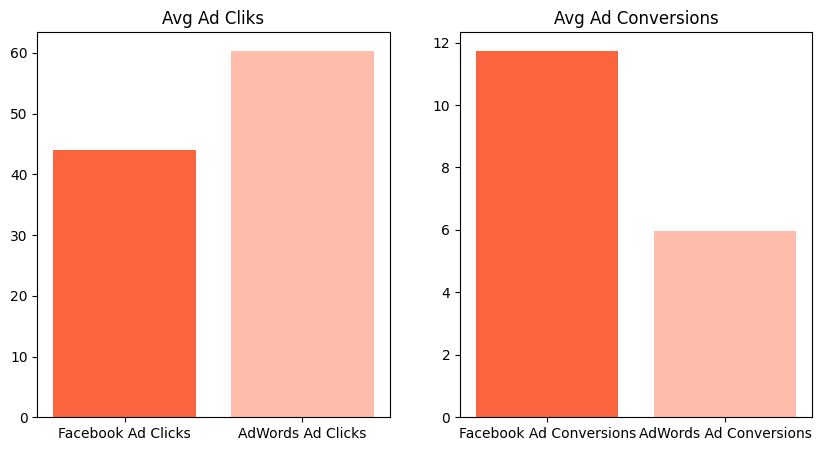

In [ ]:
df1 = df[['Facebook Ad Clicks', 'AdWords Ad Clicks']].mean().to_frame()
df2 = df[['Facebook Ad Conversions', 'AdWords Ad Conversions']].mean().to_frame()
df1.columns = ['Mean']
df2.columns = ['Mean']

# Plot the bar chart
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.title('Avg Ad Cliks' )
plt.bar(df1.index, df1['Mean'], color=['#FA643F', '#FFBCAB'])
plt.subplot(1,2,2)
plt.title('Avg Ad Conversions')
plt.bar(df2.index, df2['Mean'], color=['#FA643F', '#FFBCAB'])
plt.show()

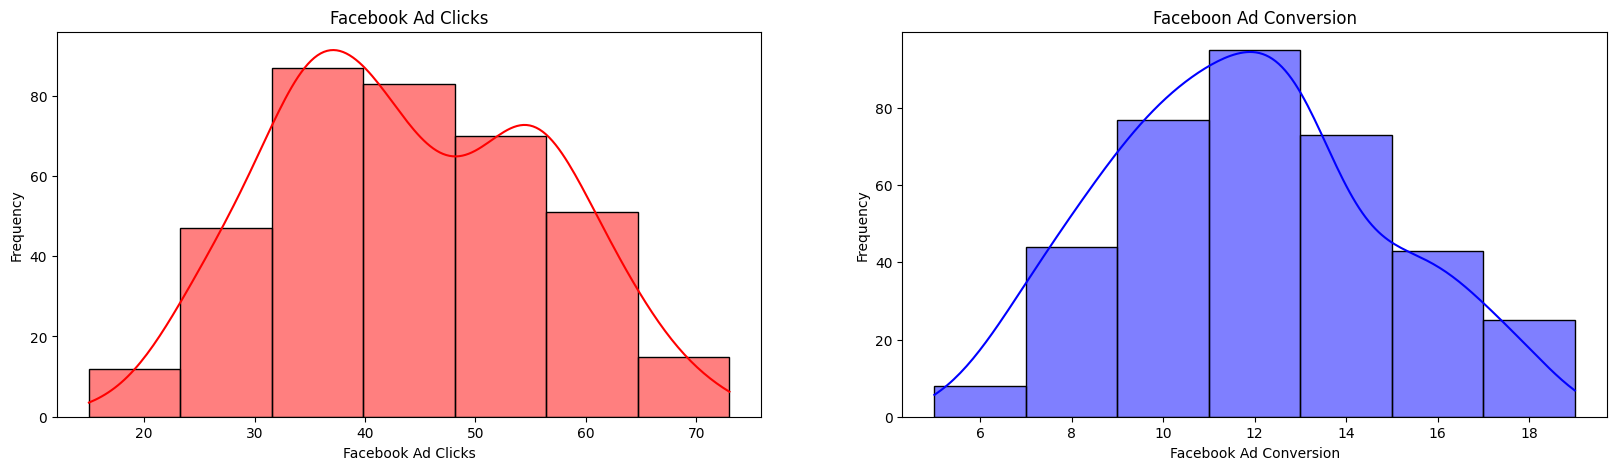

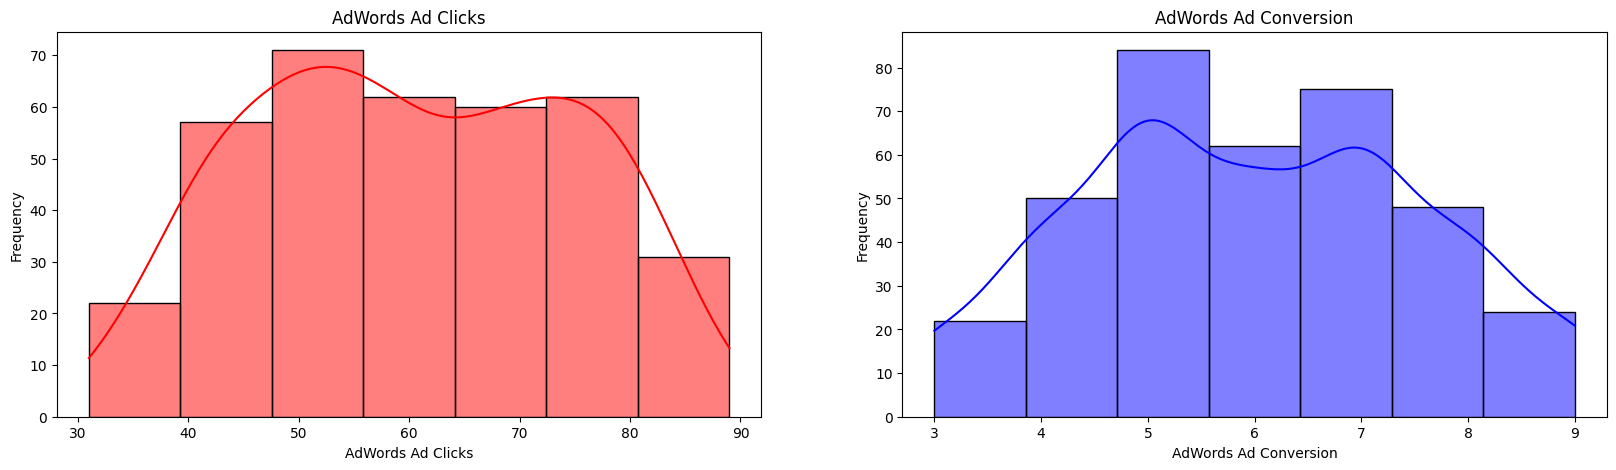

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.histplot(df['Facebook Ad Clicks'],bins=7 , color='red' , edgecolor='k' , kde=True)
plt.xlabel('Facebook Ad Clicks')
plt.ylabel('Frequency')
plt.title('Facebook Ad Clicks')
plt.subplot(1,2,2)
sns.histplot(df['Facebook Ad Conversions'],bins=7 , color='blue' , edgecolor='k' , kde=True)
plt.xlabel('Facebook Ad Conversion')
plt.ylabel('Frequency')
plt.title('Faceboon Ad Conversion')


plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.histplot(df['AdWords Ad Clicks'],bins=7 , color='red' , edgecolor='k' , kde=True)
plt.xlabel('AdWords Ad Clicks')
plt.ylabel('Frequency')
plt.title('AdWords Ad Clicks')
plt.subplot(1,2,2)
sns.histplot(df['AdWords Ad Conversions'],bins=7 , color='blue' , edgecolor='k' , kde=True)
plt.xlabel('AdWords Ad Conversion')
plt.ylabel('Frequency')
plt.title('AdWords Ad Conversion')


plt.show()

All the histogram are showing somewhat symmetrical shape. This symmetrical shape suggests that the number of clicks and conversions is relatively evenly distributed. In other words, there are not many clicks or conversions that are outliers on either the high or low end.


# How frequently do we observe days with high numbers of conversions compared to days with low numbers of conversions?

For this first we will try to create a category column with respect to daily conversions and then we will compare the conversion category of both the  campaigns to evaluate which campaign had more conversions in each category

In [ ]:
def create_conversion_category(conversion_col):
  category=[]
  for i in df[conversion_col]:
    if i<6:
      category.append('Less than 6')
    elif 6 <= i < 11:
      category.append('6-10')
    elif 11 <= i < 16:
      category.append('11-15')
    else:
      category.append('More than 15')
  return category

In [ ]:
df['Facebook Conversion Category'] = create_conversion_category('Facebook Ad Conversions')
df['AdWords Conversion Category'] = create_conversion_category('AdWords Ad Conversions')

In [ ]:
df

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks),Facebook Conversion Category,AdWords Conversion Category
0,2019-01-01,FB_Jan19,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30,6-10,Less than 6
1,2019-01-02,FB_Jan19,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05,11-15,6-10
2,2019-01-03,FB_Jan19,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23,6-10,Less than 6
3,2019-01-04,FB_Jan19,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan19,3911,49,5,$141,1.26%,11.08%,$2.86,6-10,Less than 6
4,2019-01-05,FB_Jan19,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan19,4070,55,7,$133,1.36%,12.22%,$2.40,6-10,6-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,FB_Dec19,3240,51,13,$63,1.57%,25.89%,$1.24,AW_Dec19,5332,72,9,$76,1.35%,11.92%,$1.06,11-15,6-10
361,2019-12-28,FB_Dec19,1510,69,18,$97,4.55%,25.82%,$1.42,AW_Dec19,3887,49,6,$121,1.27%,13.10%,$2.46,More than 15,6-10
362,2019-12-29,FB_Dec19,2918,44,13,$49,1.50%,29.11%,$1.11,AW_Dec19,5327,62,6,$128,1.16%,9.85%,$2.08,11-15,6-10
363,2019-12-30,FB_Dec19,2212,37,8,$102,1.68%,22.70%,$2.75,AW_Dec19,4020,71,6,$119,1.76%,7.83%,$1.68,6-10,6-10


In [ ]:
facebook=pd.DataFrame(df['Facebook Conversion Category'].value_counts()).reset_index().rename(columns = {'Facebook Conversion Category':'Category'})


In [ ]:
Adwords=pd.DataFrame(df['AdWords Conversion Category'].value_counts()).reset_index().rename(columns = {'AdWords Conversion Category':'Category'})


In [ ]:
facebook

,Category,count
0,11-15,189
1,6-10,128
2,More than 15,47
3,Less than 6,1


In [ ]:
Adwords

,Category,count
0,6-10,209
1,Less than 6,156


In [ ]:
category=pd.merge(facebook,Adwords,on='Category', how='outer').fillna(0)

In [ ]:
category

,Category,count_x,count_y
0,11-15,189,0.0
1,6-10,128,209.0
2,More than 15,47,0.0
3,Less than 6,1,156.0


In [ ]:
category=category.iloc[[3,1,0,2]]

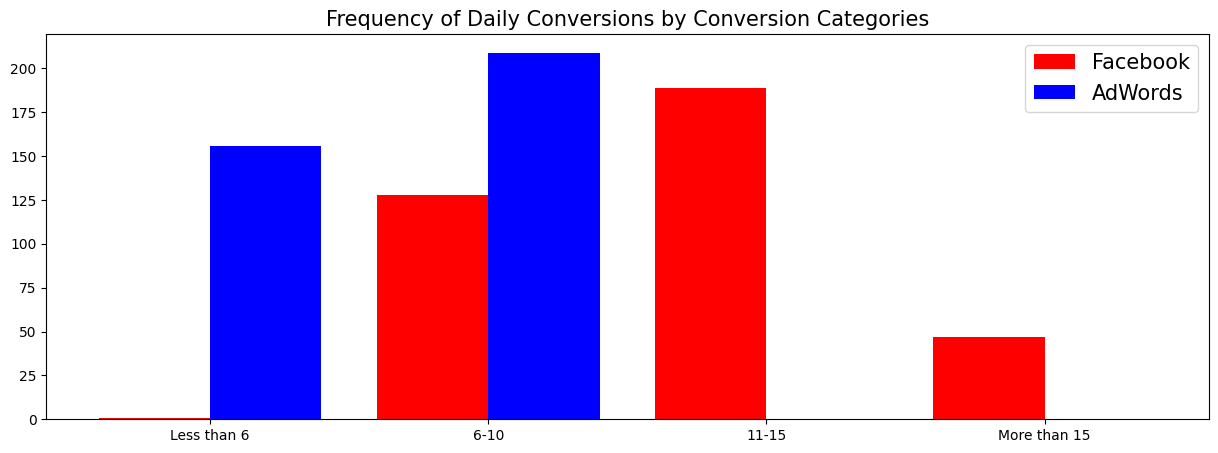

In [ ]:
x_axis=np.arange(len(category))
plt.figure(figsize=(15,5))
plt.bar(x_axis-0.2,category['count_x'],label='Facebook',width=0.4, color='red')
plt.bar(x_axis+0.2,category['count_y'],label='AdWords',width=0.4,color='blue')
plt.xticks(x_axis,category['Category'])
plt.title("Frequency of Daily Conversions by Conversion Categories", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

The data indicates that Facebook consistently experienced more frequent days with higher conversion rates compared to AdWords, where days mostly featured either very low conversion rates (less than 6) or moderate rates (6 - 10).

There is a noticeable disparity in the occurrence of high-conversion days between the two campaigns.

The complete absence of days with conversions falling between 10 - 15 and above 15 in AdWords suggests a necessity to scrutinize any strategy adjustments or external factors that might have influenced these outcomes.

# Do more clicks on the ad really lead to more sales?

In [ ]:
df

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks),Facebook Conversion Category,AdWords Conversion Category
0,2019-01-01,FB_Jan19,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30,6-10,Less than 6
1,2019-01-02,FB_Jan19,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05,11-15,6-10
2,2019-01-03,FB_Jan19,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23,6-10,Less than 6
3,2019-01-04,FB_Jan19,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan19,3911,49,5,$141,1.26%,11.08%,$2.86,6-10,Less than 6
4,2019-01-05,FB_Jan19,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan19,4070,55,7,$133,1.36%,12.22%,$2.40,6-10,6-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,FB_Dec19,3240,51,13,$63,1.57%,25.89%,$1.24,AW_Dec19,5332,72,9,$76,1.35%,11.92%,$1.06,11-15,6-10
361,2019-12-28,FB_Dec19,1510,69,18,$97,4.55%,25.82%,$1.42,AW_Dec19,3887,49,6,$121,1.27%,13.10%,$2.46,More than 15,6-10
362,2019-12-29,FB_Dec19,2918,44,13,$49,1.50%,29.11%,$1.11,AW_Dec19,5327,62,6,$128,1.16%,9.85%,$2.08,11-15,6-10
363,2019-12-30,FB_Dec19,2212,37,8,$102,1.68%,22.70%,$2.75,AW_Dec19,4020,71,6,$119,1.76%,7.83%,$1.68,6-10,6-10


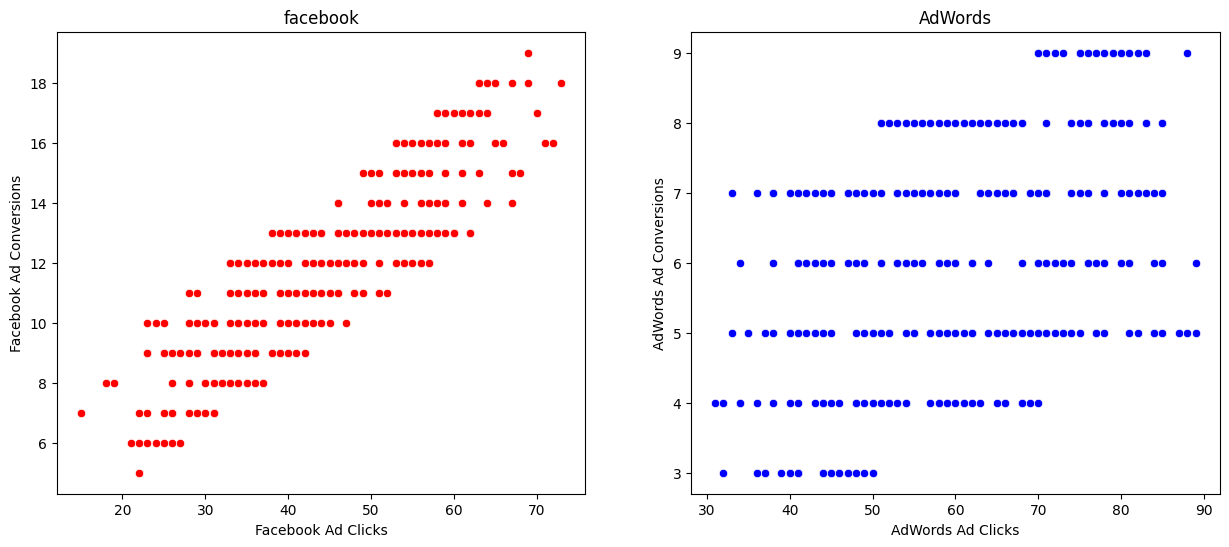

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)

plt.title('facebook')
sns.scatterplot(x='Facebook Ad Clicks',y='Facebook Ad Conversions',data=df  , color='red')
plt.xlabel('Facebook Ad Clicks')
plt.ylabel('Facebook Ad Conversions')


plt.subplot(1,2,2)
plt.title('AdWords')
sns.scatterplot(x='AdWords Ad Clicks',y='AdWords Ad Conversions',data=df  , color='blue')
plt.xlabel('AdWords Ad Clicks')
plt.ylabel('AdWords Ad Conversions')
plt.show()

We can clearly see there is string relation in facebook ad clicks and facebook ad cnversion , we will check the same through correlation coffecient

In [ ]:
facebook_corr = df[['Facebook Ad Conversions','Facebook Ad Clicks']].corr()
facebook_corr

,Facebook Ad Conversions,Facebook Ad Clicks
Facebook Ad Conversions,1.000000,0.873775
Facebook Ad Clicks,0.873775,1.000000


In [ ]:
adwords_corr = df[['AdWords Ad Conversions','AdWords Ad Clicks']].corr()
adwords_corr

,AdWords Ad Conversions,AdWords Ad Clicks
AdWords Ad Conversions,1.000000,0.447993
AdWords Ad Clicks,0.447993,1.000000


In [ ]:
print('Correlation coffecient \n-----------')
print('Facebook', round(facebook_corr.iloc[0,1],2))
print('AdWords', round(adwords_corr.iloc[0,1],2))


Correlation coffecient 
-----------
Facebook 0.87
AdWords 0.45




1. A correlation coefficient of 0.87 indicates a strong positive linear relationship between clicks on Facebook ads and sales. This suggests that as the number of clicks on Facebook ads increases, sales tend to increase as well.

2.This strong correlation suggests that Facebook ads are highly effective in driving sales, as a large portion of the variation in sales can be explained by the variation in clicks on Facebook ads.

3.The strong correlation between clicks on Facebook ads and sales suggests that Facebook advertising is highly effective in driving sales for the business. Increasing investment in Facebook ads or optimizing their performance could potentially lead to even higher sales.

4.A correlation coefficient of 0.45 indicates a moderate positive linear relationship between clicks on AdWords ads and sales. While there is still a positive relationship, it is not as strong as with Facebook ads.

5.The moderate correlation between clicks on AdWords ads and sales indicates that while AdWords advertising does contribute to sales, its effectiveness may be influenced by other factors. Further analysis is needed to identify these factors and optimize AdWords campaigns accordingly.








# Hypothesis Testing

Huypothesis: Advertising on facebook will result in greater number of conversion as compared to adword

Null Hypothesis(H0):Number of conversion from adwords is greater than number of conversions from facebook campaign
H0: µ_Facebook ≤ µ_AdWords

Alternate Hypothesis(H1) : The number of conversions from Facebook is greater than the number of conversions from AdWords.
H1:µ_Facebook > µ_AdWords

In [ ]:
print('Marketing Campaigns Conversion Mean \n-----------')
print('Facebook', round(df['Facebook Ad Conversions'].mean(),2))
print('AdWords', round(df['AdWords Ad Conversions'].mean(),2))

Marketing Campaigns Conversion Mean 
-----------
Facebook 11.74
AdWords 5.98


In [ ]:
t_stats,p_value=stats.ttest_ind(df['Facebook Ad Conversions'],df['AdWords Ad Conversions'])
print('t_stats',t_stats)
print('p_value',p_value)

t_stats 32.88402060758184
p_value 4.559680828599345e-146


In [ ]:
if p_value < 0.05:
  print('Reject Null Hypothesis')
else:
  print('Accept Null Hypothesis')

Reject Null Hypothesis


The mean number of conversions from Facebook ads (11.74) is substantially higher than the mean number of conversions from AdWords ads (5.98). This suggests that, on average, Facebook advertising is more effective in generating conversions compared to AdWords advertising.

The T statistic (32.88) is a measure of the difference between the means of the two groups relative to the variation within the groups. A larger T statistic indicates a greater difference between the means of the two groups.

The p-value (9.35e-134) is extremely small, indicating strong evidence against the null hypothesis.

The results strongly support the alternate hypothesis, indicating that the number of conversions from Facebook advertising is indeed greater than the number of conversions from AdWords advertising.

Facebook advertising appears to be a more effective channel for generating conversions compared to AdWords advertising, based on the sample data analyzed.

Given the significant difference in conversion rates between Facebook and AdWords, consider reallocating resources towards Facebook advertising efforts. This could involve increasing ad spend, expanding targeting efforts, or experimenting with different ad formats to capitalize on the platform's effectiveness in driving conversions.

# Analyzing Facebook Campaign metrics over time.

Cleaing the data and removing unwanted signs

In [ ]:
df['Facebook Click-Through Rate (Clicks / View)']=df['Facebook Click-Through Rate (Clicks / View)'].str.replace('%','').astype(float)
df['Facebook Conversion Rate (Conversions / Clicks)']=df['Facebook Conversion Rate (Conversions / Clicks)'].str.replace('%','').astype(float)
df['Facebook Cost per Click (Ad Cost / Clicks)']=df['Facebook Cost per Click (Ad Cost / Clicks)'].str.replace('$','').astype(float)
df['Cost per Facebook Ad']=df['Cost per Facebook Ad'].str.replace('$','').astype(float)

In [ ]:
df.dtypes

Date                                               datetime64[ns]
Facebook Ad Campaign                                       object
Facebook Ad Views                                           int64
Facebook Ad Clicks                                          int64
Facebook Ad Conversions                                     int64
Cost per Facebook Ad                                      float64
Facebook Click-Through Rate (Clicks / View)               float64
Facebook Conversion Rate (Conversions / Clicks)           float64
Facebook Cost per Click (Ad Cost / Clicks)                float64
AdWords Ad Campaign                                        object
AdWords Ad Views                                            int64
AdWords Ad Clicks                                           int64
AdWords Ad Conversions                                      int64
Cost per AdWords Ad                                        object
AdWords Click-Through Rate (Clicks / View)                 object
AdWords Co

In [ ]:
df1=df[['Date','Facebook Cost per Click (Ad Cost / Clicks)','Cost per Facebook Ad','Facebook Click-Through Rate (Clicks / View)','Facebook Conversion Rate (Conversions / Clicks)'
,'Facebook Ad Clicks','Facebook Ad Conversions','Facebook Ad Views',]]

In [ ]:
df1['Month']=df1['Date'].dt.month
df1['Day']=df1['Date'].dt.weekday

<ipython-input-161-c66ff087866c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Month']=df1['Date'].dt.month
<ipython-input-161-c66ff087866c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Day']=df1['Date'].dt.weekday


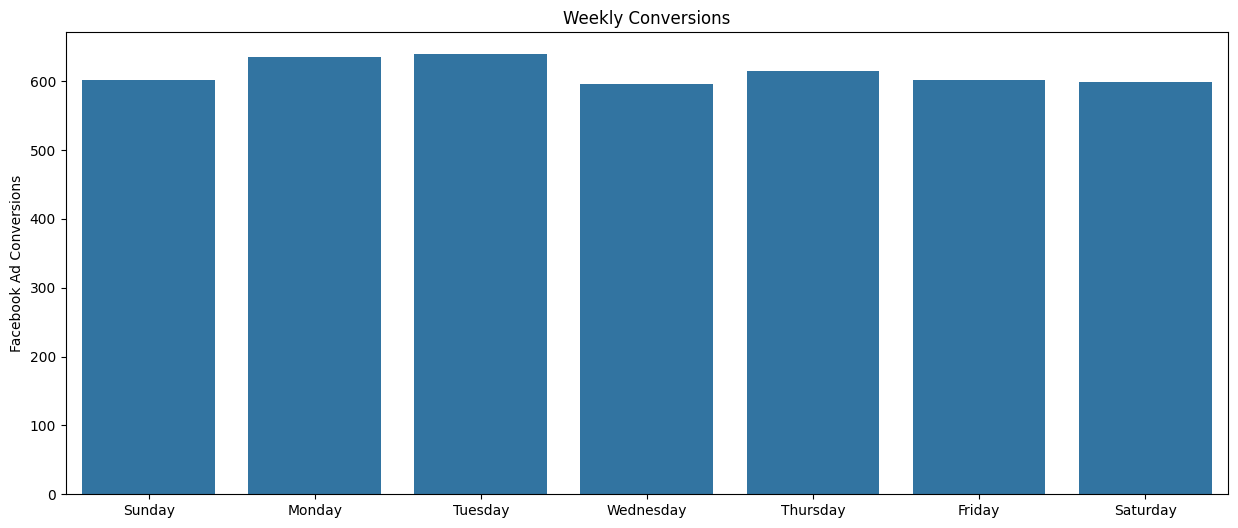

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Weekly Conversions')
Weekly_conversion=df1.groupby('Day')['Facebook Ad Conversions'].sum()
week_names= ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
sns.barplot(x=week_names,y=Weekly_conversion)
plt.show()

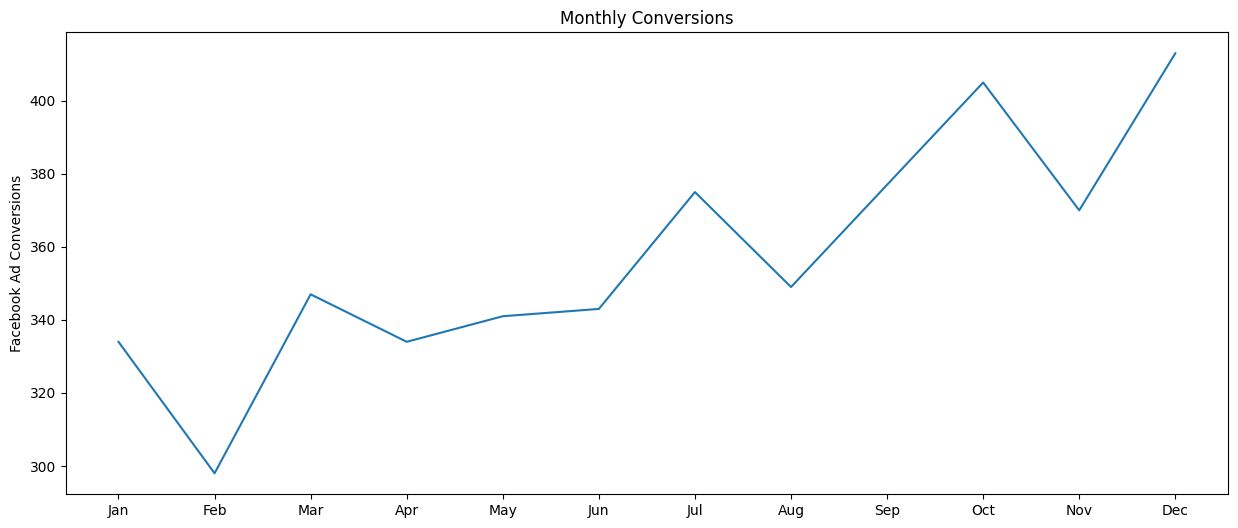

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Monthly Conversions')
Monthly_conversion=df1.groupby('Month')['Facebook Ad Conversions'].sum()
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
sns.lineplot(x=month_names,y=Monthly_conversion)
plt.show()

Across the weekdays over a year, the total number of conversions remains relatively consistent, indicating a consistent level of engagement throughout the week. However, Mondays and Tuesdays consistently exhibit the highest conversion rates compared to other days, suggesting that the beginning of the workweek sees heightened user engagement or responsiveness to marketing efforts.

Examining the monthly trend in conversions reveals an overall upward trajectory, indicating a general increase in conversions over time. However, certain months stand out with variations in conversion rates. February, April, May, June, August, and November experience a decline in conversions compared to neighboring months. These periods of decreased conversion rates could be influenced by factors such as seasonal fluctuations, changes in consumer behavior, or adjustments in marketing strategies

# How does the Cost Per Conversion (CPC) trend over time?

In [ ]:
df1

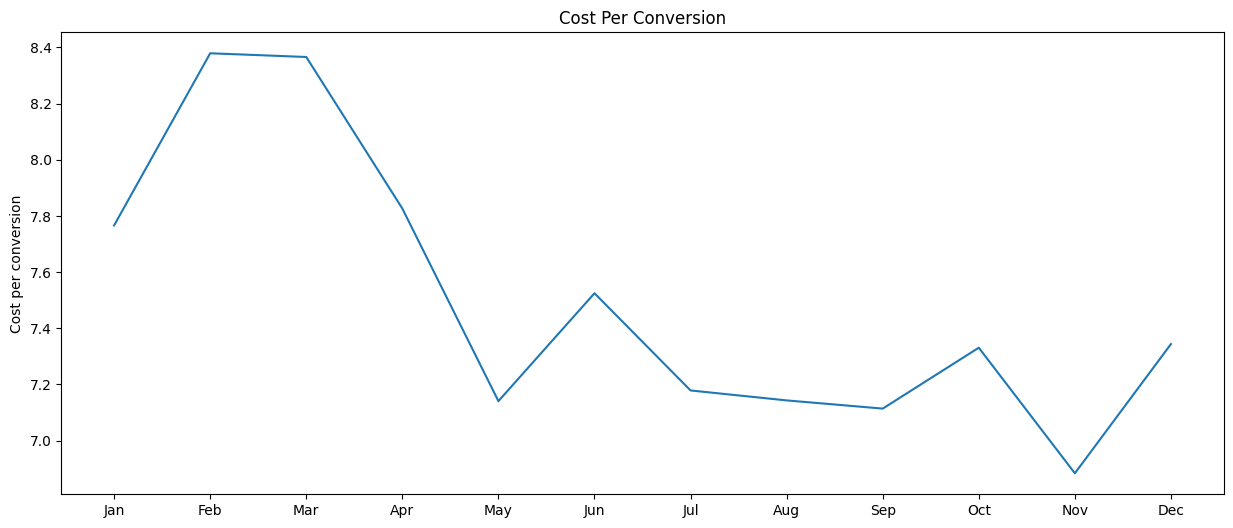

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Cost Per Conversion')
Monthly_conversion1=df1.groupby('Month')[['Facebook Ad Conversions','Cost per Facebook Ad']].sum()
Monthly_conversion1['Cost per conversion']=Monthly_conversion1['Cost per Facebook Ad']/ Monthly_conversion1['Facebook Ad Conversions']
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
sns.lineplot(x=month_names,y=Monthly_conversion1['Cost per conversion'])
plt.show()

The CPC trend over the 12-month period shows some fluctuations but overall maintains a relatively stable range.

May and November have the lowest CPC values, indicating potentially more cost-effective advertising or higher conversion rates during these periods.
February has the highest CPC value, suggesting that advertising costs may be relatively higher during this month compared to others.

Lower CPC values in certain months (e.g., May and November) could indicate periods of higher advertising effectiveness or more favorable market conditions.

Consider allocating more advertising budget to months with historically lower CPC values (e.g., May and November) to maximize ROI.

## REGRESSION ANALYSIS

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
df_p=df[['Facebook Ad Clicks','Facebook Ad Conversions']]

We are trying to find conversions on the basis of given number of clicks so our input variable x will be clicks and output varibale y will be conversions


In [ ]:
# x=df_p.drop('Facebook Ad Conversions',axis=1)
x=df_p[['Facebook Ad Clicks']]
y=df_p['Facebook Ad Conversions']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
print(x_train.shape)

(292, 1)


In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)

In [ ]:
import math
mse=mean_squared_error(y_test,y_predict)
r2=r2_score(y_test,y_predict)*100
print('Mean Squared Error:',mse)
print('Accuracy is : ', math.sqrt(mse))
print('R2 Score:',r2)

Mean Squared Error: 2.186386803114262
Accuracy is :  1.4786435686514388
R2 Score: 77.52285038622598


In [ ]:
x_test_1d = x_test.values.flatten()
y_test_1d = y_test.values.flatten()
y_predict_1d = y_predict.flatten()

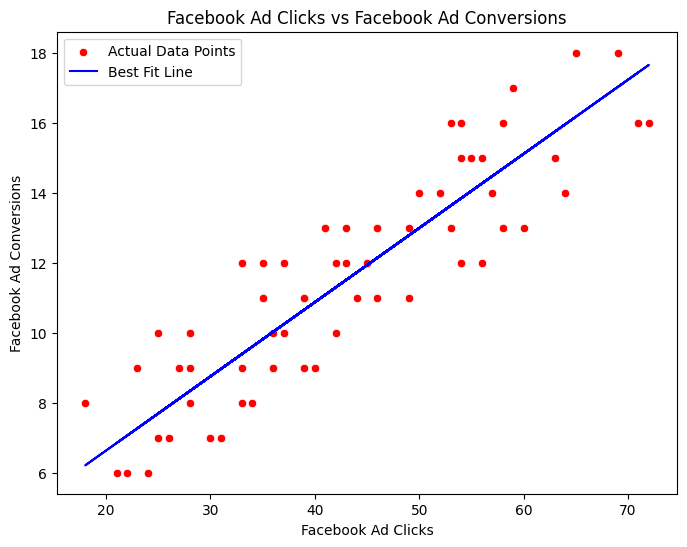

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=x_test_1d,y=y_test_1d,color='red', label='Actual Data Points')
plt.plot(x_test_1d,y_predict_1d,color='blue',label='Best Fit Line ')
plt.xlabel('Facebook Ad Clicks')
plt.ylabel('Facebook Ad Conversions')
plt.title('Facebook Ad Clicks vs Facebook Ad Conversions')
plt.legend()
plt.show()

In [ ]:
y_predict=model.predict([[50]])
y_predict[0]